**Plot FD snapshots**

**Daniel Köhn**

**Kiel, 30/08/2017**

**Import necessary packages**

In [127]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import pickle

**FD grid dimensions **

In [128]:
DH = 0.07;
NX = 180;
NY = 180;

**Define Axis**

In [129]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

**Define fonts**

In [130]:
FSize = 20
font = {'color':  'black',
        'weight': 'bold',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 10, 11

**Read permitivity model and snapshots**

In [131]:
f = open ('start/2_cross_TE_true.eps')
data_type = np.dtype ('float32').newbyteorder ('<')
eps = np.fromfile (f, dtype=data_type)
eps = eps.reshape(NX,NY)
eps = np.transpose(eps)
eps = np.flipud(eps)

In [132]:
f1 = open ('snap/2_cross_TE_shot_1_50_MHz.p')
snap1 = np.fromfile (f1, dtype=data_type)
snap1 = snap1.reshape(NX,NY)
snap1 = np.transpose(snap1)
snap1 = np.flipud(snap1)

In [133]:
f1 = open ('snap/2_cross_TE_shot_1_200_MHz.p')
snap2 = np.fromfile (f1, dtype=data_type)
snap2 = snap2.reshape(NX,NY)
snap2 = np.transpose(snap2)
snap2 = np.flipud(snap2)

**Plot $\alpha$-blending of FD snapshots (Jet) and permitivity model (Gray)**

In [134]:
def do_plot(n, snap, an, title):
    
    ax=plt.subplot(1,2,n)
    
    extent = [DH,NX*DH,DH,NY*DH]
    cmax=5e-2
    cmin=-cmax

    plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rc('text', usetex=True)

    im1 = plt.imshow(eps, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
    plt.hold(True)

    im2 = plt.imshow(snap, cmap=plt.cm.seismic, alpha=0.75, interpolation='bicubic',extent=extent, vmin=cmin, vmax=cmax)

    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    
    plt.title(title, fontdict=font)
    if(n==1):
        plt.ylabel('Depth [m]', fontdict=font)
    plt.xlabel('Distance [m]', fontdict=font)
    if(n==2):
        ax.set_yticks([])
    plt.gca().invert_yaxis()

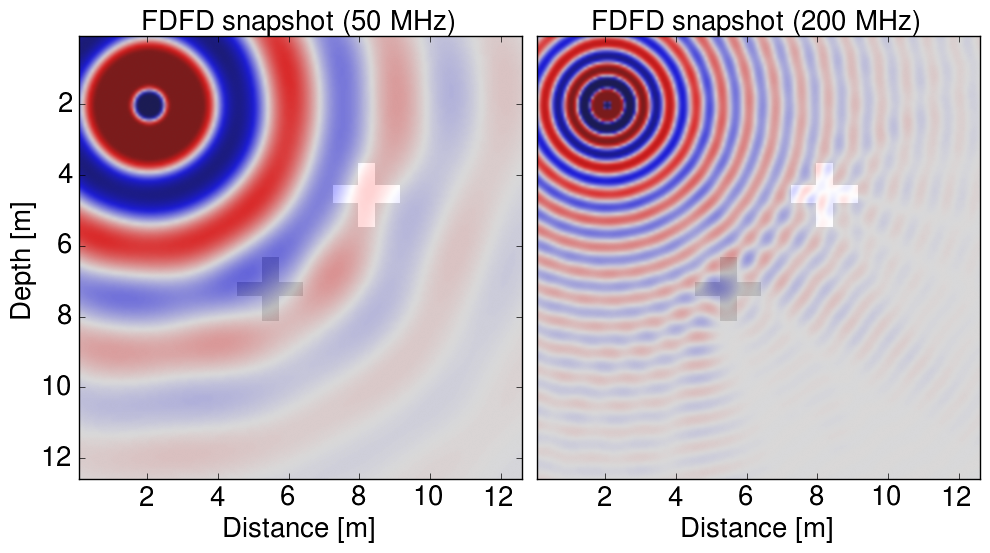

In [135]:
plt.close('all')
plt.figure()
do_plot(1, snap1,'(a)', r"FDFD snapshot (50 MHz)")
do_plot(2, snap2,'(b)', r"FDFD snapshot (200 MHz)")
plt.tight_layout()
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('test.pdf', bbox_inches='tight', format='pdf')
plt.show()